<a href="https://colab.research.google.com/github/sourabh21-alt/sourabhdiwan_object_recognition/blob/master/geeksman_project1_modeltrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [3]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [4]:
!kaggle datasets download -d sourabhdiwan123/cifardataset

 96% 113M/117M [00:04<00:00, 19.5MB/s] 
100% 117M/117M [00:04<00:00, 25.3MB/s]


In [5]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: cifar10/cifar10/train/truck/0002.png  
  inflating: cifar10/cifar10/train/truck/0003.png  
  inflating: cifar10/cifar10/train/truck/0004.png  
  inflating: cifar10/cifar10/train/truck/0005.png  
  inflating: cifar10/cifar10/train/truck/0006.png  
  inflating: cifar10/cifar10/train/truck/0007.png  
  inflating: cifar10/cifar10/train/truck/0008.png  
  inflating: cifar10/cifar10/train/truck/0009.png  
  inflating: cifar10/cifar10/train/truck/0010.png  
  inflating: cifar10/cifar10/train/truck/0011.png  
  inflating: cifar10/cifar10/train/truck/0012.png  
  inflating: cifar10/cifar10/train/truck/0013.png  
  inflating: cifar10/cifar10/train/truck/0014.png  
  inflating: cifar10/cifar10/train/truck/0015.png  
  inflating: cifar10/cifar10/train/truck/0016.png  
  inflating: cifar10/cifar10/train/truck/0017.png  
  inflating: cifar10/cifar10/train/truck/0018.png  
  inflating: cifar10/cifar10/train/truck/0019.png  
  inflating: 

In [6]:
os.listdir("/content/cifar10/cifar10/train")

['truck',
 'airplane',
 'horse',
 'cat',
 'bird',
 'automobile',
 'dog',
 'frog',
 'deer',
 'ship']

In [7]:
bs=64

In [8]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("/content/cifar10/cifar10/train"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

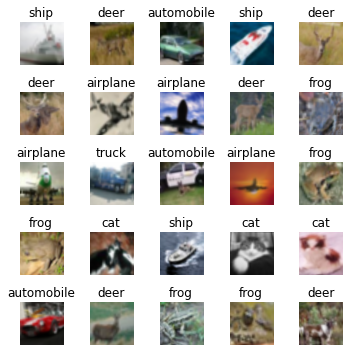

In [9]:
data.show_batch(rows=5, figsize=(5,5))

In [10]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.559989,0.331717,0.889400,11:13
1,0.315072,0.218356,0.930800,11:13
2,0.218160,0.162964,0.946000,11:09
3,0.191362,0.152489,0.948500,11:10


In [12]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:
os.makedirs("/content/drive/My Drive/dl_projects/1.obj_recognition",exist_ok=True)

In [14]:
my_dir="/content/drive/My Drive/dl_projects/1.obj_recognition"

In [15]:
learn.save(my_dir+"/Stage-1")

In [16]:
learn.export(my_dir+"/export.pkl")

In [17]:
!pip install -U kora
from kora.drive import upload_public
url = upload_public(my_dir+"/export.pkl")
url

'https://drive.google.com/uc?id=1_1SH4PgylXw9uSaG7qKWa6jEx-znbn-g'